# MNIST handwritten digit image recognition

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


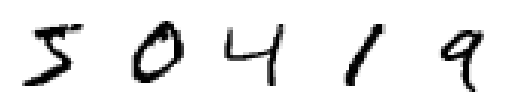

First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
fig, ax=plt.subplots(1,5)
for ii in range(5):
    some_digit_image = x_train[ii:ii+1].reshape(28,28)
    plt.sca(ax[ii])
    plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis("off")
plt.show()

print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

In [ ]:
# Flatten the images for use in a dense neural net
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("Reshaped training data: ", x_train.shape)

Reshaped training data:  (60000, 784)


# Create and Train network using Tensorflow/Keras

In [ ]:
import keras.layers as layers
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=16, activation='sigmoid', input_shape=(image_vector_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 16)                12560     
                                                                 
 dense_99 (Dense)            (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
inputs = keras.Input(shape=(image_vector_size,), name="img")
x = layers.Dense(units=16, activation='relu',use_bias=False)(inputs)
outputs = layers.Dense(units=num_classes, activation='softmax')(x)
model_alternate = keras.Model(inputs=inputs, outputs=outputs)
model_alternate.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 784)]             0         
                                                                 
 dense_100 (Dense)           (None, 16)                12544     
                                                                 
 dense_101 (Dense)           (None, 10)                170       
                                                                 
Total params: 12714 (49.66 KB)
Trainable params: 12714 (49.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
422/422 [==============================] - 2s 4ms/step - loss: 1.4826 - accuracy: 0.6312 - val_loss: 0.9415 - val_accuracy: 0.8178
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 0.8142 - accuracy: 0.8209 - val_loss: 0.6073 - val_accuracy: 0.8748
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 0.6119 - accuracy: 0.8491 - val_loss: 0.4781 - val_accuracy: 0.8847
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.5194 - accuracy: 0.8612 - val_loss: 0.4207 - val_accuracy: 0.8913
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.4678 - accuracy: 0.8696 - val_loss: 0.3830 - val_accuracy: 0.8988


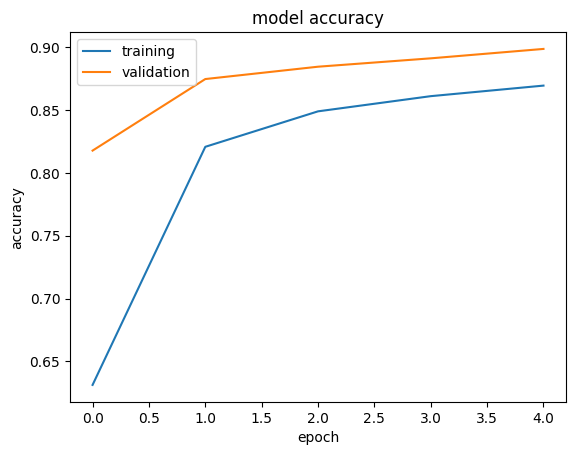

Test loss: 0.442
Test accuracy: 0.877


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Assignment 1: Create and Train same network using PyTorch
Recreate the above results from Tensorflow but now use PyTorch


In [1]:
#importing necessary libraries

import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#importing the dataset and transforming them for the use

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 246468060.45it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 66667965.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 99009196.67it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14744991.31it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [4]:
#loading the training and testing dataset

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

In [5]:
#traing the model

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100)
        self.linear2 = nn.Linear(100, 50)
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

In [6]:
def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

In [7]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    net.train()

    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

In [8]:
#using 10 epochs fof greater accuracy

cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

In [9]:
#calculating accuracy for each epoch

for epoch in range(epoch):
    net.train()

    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

In [10]:
#displaying the final accuracy

correct = 0
total = 0
with t.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.967


# **The accuracy is 0.967 when the same network is trained using PyTorch**